## Анализ рынка автомобилей в Республике Казахстан



Датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из
официальной статистики VAG.

Цель - проанализировать авторынок Казахстана

Задачи:

- очистить данные
- определить топовые марки
- посмотреть динамику продаж в целом по рынку и по категориям
- проанализировать продажи по регионам и автоцентрам


In [1]:
import pandas as pd


<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Лучше весь импорт библиотек поместить в первую ячейку кода - это соответствует стандартам оформления кода РЕР8

In [2]:
# data = pd.read_csv('D:/Downloads/kz_2019_final_all_dirt.csv', delimiter = ',')
data = pd.read_csv('kz_2019_final_all_dirt.csv', delimiter = ',')

C:\Users\fillorent\AppData\Local\Temp\ipykernel_15996\864228695.py:2: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('kz_2019_final_all_dirt.csv', delimiter = ',')


In [3]:
data.head()

,Unnamed: 0,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,...,Физ. Лицо,безналичный,1.0,31250.000000,31250.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,...,Физ. Лицо,наличный,1.0,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,...,Физ. Лицо,наличный,1.0,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,...,Физ. Лицо,наличный,1.0,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,...,Юр. Лицо,безналичный,1.0,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс,D,Импорт


In [4]:
data.columns

Index(['Unnamed: 0', 'Год', 'Месяц', 'Компания', 'Бренд', 'Модель',
       'Модификация', 'Год выпуска', 'Страна-производитель', 'Вид топлива',
       'Объём двиг, л,', 'Коробка передач', 'Тип привода', 'Сегмент', 'Регион',
       'Наименование дилерского центра', 'Тип клиента', 'Форма расчета',
       'Количество', 'Цена, USD', 'Продажа, USD', 'Область',
       'Сегментация 2013', 'Класс 2013', 'Сегментация Eng',
       'Локализация производства'],
      dtype='object')

Столбец 'Unnamed: 0' полностью дублирует индексы. С учетом того, что данные брались из нескольких таблиц, то есть вероятность, что столбец не несет смысловой нагрузки. Однако у нас нет других уникальных идентификаторов конкретного автомобиля, кроме индекса, который может являться идентификатором продажи, поэтому удалять все явные дубликаты - рискованно потерей данных

In [5]:
data1 = data.drop(columns= 'Unnamed: 0') # на всякий проверяем количество явных дубликатов в отдельной переменной
data1.duplicated().sum()

13356

Явных дубликатов в данном случае - почти половина датасета. Есть риск потерять данные при удалении

In [79]:
# ячейка ревьюера:

# подгружу исходные данные - буду еще к ним возвращаться для примеров :)
reviewer_df = pd.read_csv('kz_2019_final_all_dirt.csv', low_memory=False).drop(columns=['Unnamed: 0'])


# посмотрим на особенности данных, содержащие дубликаты:
(reviewer_df[reviewer_df.duplicated() == True] # оставляем только дубликаты
 .groupby(['Компания']) # группируем по важным признакам - компания
 .agg(w_dupl_count = ('Количество','count'),
      w_dupl_sum = ('Количество','sum')) # подсчитываем ключевые метрики - доли по продажам
 .reset_index()
 .assign(count_share = lambda x: x['w_dupl_sum'] / reviewer_df[reviewer_df.duplicated() == True]['Количество'].sum()) # смотрим на доли
).merge((reviewer_df[reviewer_df.duplicated() == False])
         .groupby(['Компания']) # группируем по важным признакам - компания
         .agg(wo_dupl_count = ('Количество','count'),
              wo_dupl_sum = ('Количество','sum'))
         .reset_index()
         .assign(count_share = lambda x: x['wo_dupl_sum'] / reviewer_df[reviewer_df.duplicated() == False]['Количество'].sum()) # смотрим на доли
        , on = "Компания", how='left'
       )

,Компания,w_dupl_count,w_dupl_sum,count_share_x,wo_dupl_count,wo_dupl_sum,count_share_y
0,Allur Auto,763,763.0,0.057060,596,596.0,0.019487
1,Astana Motors,2980,2980.0,0.222854,2766,2801.0,0.091581
2,Eurasia Motor Premium,4,4.0,0.000299,20,20.0,0.000654
3,Jaguar Land Rover,31,31.0,0.002318,133,155.0,0.005068
4,Mercur Auto,233,233.0,0.017424,707,942.0,0.030799
5,Nissan Manufacturing RUS,23,24.0,0.001795,1014,1737.0,0.056793
6,Renault Россия,551,551.0,0.041206,537,537.0,0.017558
7,Subaru Kazakhstan,178,178.0,0.013311,342,342.0,0.011182
8,Toyota Motor Kazakhstan,5549,5549.0,0.414972,4893,4893.0,0.159980
9,Автомир ГК,2,4.0,0.000299,109,258.0,0.008436


In [6]:
#удаляем ненужные столбцы
data = data.drop(columns=['Модификация','Форма расчета',  'Сегментация Eng', 'Сегмент','Локализация производства', 'Наименование дилерского центра'])

In [7]:
data.columns

Index(['Unnamed: 0', 'Год', 'Месяц', 'Компания', 'Бренд', 'Модель',
       'Год выпуска', 'Страна-производитель', 'Вид топлива', 'Объём двиг, л,',
       'Коробка передач', 'Тип привода', 'Регион', 'Тип клиента', 'Количество',
       'Цена, USD', 'Продажа, USD', 'Область', 'Сегментация 2013',
       'Класс 2013'],
      dtype='object')

In [8]:
#переименовываем столбцы на английский язык
data.columns = ['index', 'year', 'month', 'company', 'brand', 'model',
                'production_year', 'country_of_origin', 'fuel_type', 'engine_capacity',
               'transmission', 'drive_type', 'region', 'client_type', 'quantity', 'price_usd', 'sale_usd', 'district',
               'segment_2013', 'class_2013']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32854 entries, 0 to 32853
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              32854 non-null  int64  
 1   year               32854 non-null  int64  
 2   month              32854 non-null  object 
 3   company            32854 non-null  object 
 4   brand              32854 non-null  object 
 5   model              32854 non-null  object 
 6   production_year    32700 non-null  object 
 7   country_of_origin  32854 non-null  object 
 8   fuel_type          31942 non-null  object 
 9   engine_capacity    30968 non-null  object 
 10  transmission       31662 non-null  object 
 11  drive_type         30589 non-null  object 
 12  region             32854 non-null  object 
 13  client_type        27124 non-null  object 
 14  quantity           32849 non-null  float64
 15  price_usd          32854 non-null  float64
 16  sale_usd           328

In [10]:
data.isna().sum() # смотрим количество пропущенных значений

index                   0
year                    0
month                   0
company                 0
brand                   0
model                   0
production_year       154
country_of_origin       0
fuel_type             912
engine_capacity      1886
transmission         1192
drive_type           2265
region                  0
client_type          5730
quantity                5
price_usd               0
sale_usd                0
district                0
segment_2013            0
class_2013              0
dtype: int64

Пропущенные значения будет сложно заметить на подходящее значение без искажения данных. Будем заменять их в тех столбцах, где необходимо преобразование типа данных

In [11]:
data.info() # проверяем типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32854 entries, 0 to 32853
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              32854 non-null  int64  
 1   year               32854 non-null  int64  
 2   month              32854 non-null  object 
 3   company            32854 non-null  object 
 4   brand              32854 non-null  object 
 5   model              32854 non-null  object 
 6   production_year    32700 non-null  object 
 7   country_of_origin  32854 non-null  object 
 8   fuel_type          31942 non-null  object 
 9   engine_capacity    30968 non-null  object 
 10  transmission       31662 non-null  object 
 11  drive_type         30589 non-null  object 
 12  region             32854 non-null  object 
 13  client_type        27124 non-null  object 
 14  quantity           32849 non-null  float64
 15  price_usd          32854 non-null  float64
 16  sale_usd           328

In [12]:
data['engine_capacity'] = data['engine_capacity'].fillna(0)


In [13]:

data['production_year'] = data['production_year'].fillna(0)
data = data[data['production_year'] != 0]
data['production_year'].isna().sum()

0

In [14]:
data.duplicated().sum() # проверяем явные дубли

0

In [15]:
#чистим столбец с объемом дваигателя,

data['engine_capacity'] = data['engine_capacity'].apply(lambda x:str(x).replace(',', '.'))

data['engine_capacity'].unique()


array(['1.4', '2', '3', '1.5', '4.4', '6.6', '0', '1.8', '1.596', '1596',
       '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1.4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1.6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.9', '4.6', '5.7', '10.5', '6.7', '4', '5.5',
       '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3', '0.002', '0.0016',
       '1998', '13', '16', '1400', '2.3', '1.33', '2.4G', '2.693', '2693',
       '2.235', '2235', '2.0', '14860', '14.8', '17.5', '1.2T', '4.88',
       '4.0'], dtype=object)

In [86]:
# ячейка ревьюера:

sorted(data['engine_capacity'].unique())

[0.0,
 0.0016,
 0.002,
 1.2,
 1.248,
 1.25,
 1.3,
 1.33,
 1.368,
 1.4,
 1.5,
 1.591,
 1.596,
 1.598,
 1.6,
 1.69,
 1.7,
 1.774,
 1.8,
 1.998,
 1.999,
 2.0,
 2.2,
 2.235,
 2.3,
 2.359,
 2.4,
 2.5,
 2.693,
 2.7,
 2.8,
 2.9,
 3.0,
 3.342,
 3.47,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 3.933,
 4.0,
 4.2,
 4.4,
 4.5,
 4.6,
 4.88,
 4.9,
 5.0,
 5.2,
 5.5,
 5.6,
 5.7,
 6.2,
 6.5,
 6.6,
 6.7,
 7.5,
 7.8,
 8.7,
 10.3,
 10.5,
 11.0,
 12.0,
 12.3,
 13.0,
 14.8,
 14.86,
 16.0,
 17.5]

In [16]:
#функция удаления текста из столбца
def remove_prefix(name_new):
    removal_list = ['Turbo', 'turbo', 'MPI', 'GDI', 'CRDI VGT', 'L', 'T-GDI', 'MT', 'AT', '#Н/Д', 'Л.С.' ,'T', 'h', 'KWH', 'L.','CRDI','WG','G','-']
    for word in removal_list:
        name_new = name_new.replace(word, "").strip()
    return name_new
data['engine_capacity'] = data['engine_capacity'].apply(remove_prefix)
data['engine_capacity'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', '0', '1.8', '1.596', '1596',
       '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400', '2.5', '1.6',
       '3.5', '2.2', '2.7', '2.8', '4.2', '5', '3.9', '7.5', '11',
       '3.933', '12.3', '3.7', '5.6', '7.8', '2.9', '5.2', '10.3', '8.7',
       '1600', '1.998', '1.598', '1.248', '2.359', '2359', '1999', '3.8',
       '3800', '1.591', '1.368', '3.342', '3.47', '3470', '2000', '1.999',
       '1.69', '1690', '1.774', '1598', '1774', '4.9', '4.6', '5.7',
       '10.5', '6.7', '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5',
       '1.25', '1.3', '0.002', '0.0016', '1998', '13', '16', '2.3',
       '1.33', '2.693', '2693', '2.235', '2235', '2.0', '14860', '14.8',
       '17.5', '4.88', '4.0'], dtype=object)

In [17]:
data['engine_capacity'] = data['engine_capacity'].astype(float) #после чистки приводим с нужному типу

In [18]:
data.info() #проверяем результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32700 entries, 0 to 32853
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              32700 non-null  int64  
 1   year               32700 non-null  int64  
 2   month              32700 non-null  object 
 3   company            32700 non-null  object 
 4   brand              32700 non-null  object 
 5   model              32700 non-null  object 
 6   production_year    32700 non-null  object 
 7   country_of_origin  32700 non-null  object 
 8   fuel_type          31829 non-null  object 
 9   engine_capacity    32700 non-null  float64
 10  transmission       31617 non-null  object 
 11  drive_type         30477 non-null  object 
 12  region             32700 non-null  object 
 13  client_type        27124 non-null  object 
 14  quantity           32695 non-null  float64
 15  price_usd          32700 non-null  float64
 16  sale_usd           327

In [19]:
data['month'].unique() #проверяем значения в столбце с месяцем

array(['Март', 'Май', 'Июнь', 'Июль', 'Январь', 'Февраль', 'Апрель',
       'Август', 'Сентябрь'], dtype=object)

In [20]:
#функция для преобразования названия месяца в число
def monthToNum(month):
        months = ['Январь',
            'Февраль',
            'Март',
            'Апрель',
            'Май',
            'Июнь',
            'Июль',
            'Август',
            'Сентябрь',
            'Октябрь',
            'Ноябрь',
            'Декабрь']
        return months.index(month) + 1

data['month'] = data['month'].apply(monthToNum)
data.head()

,index,year,month,company,brand,model,production_year,country_of_origin,fuel_type,engine_capacity,transmission,drive_type,region,client_type,quantity,price_usd,sale_usd,district,segment_2013,class_2013
0,0,2019,3,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-tronic,NaN,Алматы,Физ. Лицо,1.0,31250.000000,31250.000000,г.Алматы,Легковые автомобили,C класс
1,1,2019,5,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тronic,FWD,Алматы,Физ. Лицо,1.0,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс
2,2,2019,6,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тroic,FWD,Алматы,Физ. Лицо,1.0,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс
3,3,2019,7,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-troic,передний,Алматы,Физ. Лицо,1.0,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс
4,4,2019,7,Mercur Auto,Audi,A4,2017,Германия,Бензин,2.0,S-troic,quattro,Алматы,Юр. Лицо,1.0,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс


In [21]:
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1)) #делаем отдельный столбец с датой

In [22]:
data = data.drop(columns=['year', 'month'])

Типы данных преобразованы

In [23]:
data['company'].unique() #ищем неявные дубликаты в названиях автоцентов

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Sivi Finance Consulting', 'Eurasia Motor Premium',
       'Daewoo Bus Kazakhstan', 'Caspian Motors', 'Каспиан Моторс',
       'СемАЗ', 'ТК Рос-Авто', 'Astana Motors',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS', 'СВС',
       'СВС-ТРАНС', 'Allur Auto', 'Jaguar Land Rover', 'ТК КАМАЗ',
       'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'MMC RUS', 'ММС Рус', 'УзАвто-Казахстан', 'Алматы АТО',
       'Renault Россия', 'Scania Central Asia', 'Subaru Kazakhstan',
       'SMC', 'Scandinavian Motors', 'Хино Моторс Казахстан',
       'Hino Motors Kazakhstan'], dtype=object)

In [24]:
data['company'] = data['company'].apply(lambda x:x.replace('MMC RUS', 'ММС Рус'))

In [25]:
data['brand'].unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco',
       'Jac', 'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus',
       'Lifan', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks',
       'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Shacman', 'Skoda', 'SsangYong', 'Subaru',
       'Suzuki', 'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'Урал', 'МАЗ',
       'Cadillac', 'ANKAI', 'Hino', 'Rolls Royce'], dtype=object)

Неявные дубли удалены

In [26]:
data['model'].unique()

array(['A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Q5', 'Q7', '1 серия',
       '2 серия', '3 серия', '4 серия', '5 серия', '6 серия', '7 серия',
       'i3', 'X1', 'X3', 'X4', 'X5', 'X6', 'Aveo', 'Captiva', 'Niva',
       'Tahoe', 'Tracker', 'BS 106 A', 'EcoSport', 'Explorer', 'Fiesta',
       'Focus', 'Kuga', 'Mondeo', 'Transit', 'Transit Custom',
       'BJ1032V3JB3-S', 'BJ3143DKPGA-1', 'BJ3253DMPKB-AD',
       'BJ5032V3BB3-S', 'BJ5163VKCHN-1', '2217', '2310', '2705', '2752',
       '3221', '3302', '3308', '3309', 'Next', 'Accent', 'Creta',
       'Elantra', 'Genesis G90', 'Grandeur', 'Santa Fe', 'Sonata',
       'TQ-1/H-1', 'County', 'H350', 'HD 160', 'HD 170', 'HD 260',
       'HD 65', 'HD 72', 'HD 78', 'Universe', 'Tucson', 'Q30', 'Q50',
       'QX30', 'QX50', 'QX60', 'QX70', 'QX80', 'D-MAX', 'FVR34', 'NMR',
       'NPR', 'NQR71', 'Daily', 'Daily A', 'Daily V', 'Stralis', 'Tipper',
       'S3', 'S5', 'F-Pace', 'XE', 'XF', '4308', '43114', '43118',
       '43253', '43502', '44108', '4514

 Среди моделей неявных дублей не обнаружено. Возможно у одной модели могут быть два названия , например Lada Niva  = Lada 4x4 , но для большого количество уникальных значений сложно определить их второе название человеку не из сферы.

In [27]:
data['production_year'].unique()

array(['2017', '2018', '2016', '2011', '2015', '2014', '2013', '2012',
       '2\xa0018', '2\xa0017', '2\xa0016', 2018, 2017, 2015, 2016],
      dtype=object)

In [28]:
#удаляем неявные дубли в столбце с годом производства
data['production_year'] = data['production_year'].apply(lambda x: str(x).replace('\xa0', ''))
data['production_year'].unique()

array(['2017', '2018', '2016', '2011', '2015', '2014', '2013', '2012'],
      dtype=object)

In [29]:
data['fuel_type'].unique()


array(['Бензин', 'Дизель', 'гибрид', 'Электрический', nan, '0', 'дизель ',
       'Газовый'], dtype=object)

In [30]:
data[data['fuel_type'] =='0']

,index,company,brand,model,production_year,country_of_origin,fuel_type,engine_capacity,transmission,drive_type,region,client_type,quantity,price_usd,sale_usd,district,segment_2013,class_2013,date
19519,19519,Renault Россия,Renault,Kaptur,2018,Российская Федерация,0,1.6,CVT,NaN,Петропавловск,NaN,1.0,18154.706431,18154.706431,Северо-Казахстанская область,Внедорожники,Субкомпактные SUV,2019-02-01
19732,19732,Renault Россия,Renault,Koleos,2017,Российская Федерация,0,0.0,0,NaN,Караганда,NaN,1.0,34690.897794,34690.897794,Карагандинская область,Внедорожники,Компактные SUV,2019-02-01
19733,19733,Renault Россия,Renault,Koleos,2017,Российская Федерация,0,0.0,0,NaN,Астана,NaN,1.0,34690.897794,34690.897794,г.Астана,Внедорожники,Компактные SUV,2019-02-01
19953,19953,Renault Россия,Renault,Sandero,2018,Российская Федерация,0,0.0,0,NaN,Астана,NaN,1.0,14137.931034,14137.931034,г.Астана,Легковые автомобили,B класс,2019-02-01


Всего 4 строки с нудевым значением вида топлива. Их можно удалить, это не отразится на исследовании

In [31]:
data = data[data['fuel_type'] !='0']

In [32]:
#функция для для приведения вида двигателя к единообразию

def fuel(type):
    if type in ['Бензин', 'бензин ']:
        return 'F'
    if type in ['Дизель', 'дизель ']:
        return 'D'
    if type in ['Электричество', 'Электро']:
        return 'E'
    if type == 'гибрид':
        return 'HYB'
    if type == 'Газовый':
        return 'G'
    else: return None

data['fuel_type'] = data['fuel_type'].apply(fuel)



In [33]:
data['fuel_type'].unique()

array(['F', 'D', 'HYB', None, 'G'], dtype=object)

In [34]:
data['engine_capacity'].unique()

array([1.400e+00, 2.000e+00, 3.000e+00, 1.500e+00, 4.400e+00, 6.600e+00,
       0.000e+00, 1.800e+00, 1.596e+00, 1.596e+03, 2.400e+00, 3.000e+03,
       2.400e+03, 1.700e+00, 6.200e+00, 1.800e+03, 1.400e+03, 2.500e+00,
       1.600e+00, 3.500e+00, 2.200e+00, 2.700e+00, 2.800e+00, 4.200e+00,
       5.000e+00, 3.900e+00, 7.500e+00, 1.100e+01, 3.933e+00, 1.230e+01,
       3.700e+00, 5.600e+00, 7.800e+00, 2.900e+00, 5.200e+00, 1.030e+01,
       8.700e+00, 1.600e+03, 1.998e+00, 1.598e+00, 1.248e+00, 2.359e+00,
       2.359e+03, 1.999e+03, 3.800e+00, 3.800e+03, 1.591e+00, 1.368e+00,
       3.342e+00, 3.470e+00, 3.470e+03, 2.000e+03, 1.999e+00, 1.690e+00,
       1.690e+03, 1.774e+00, 1.598e+03, 1.774e+03, 4.900e+00, 4.600e+00,
       5.700e+00, 1.050e+01, 6.700e+00, 4.000e+00, 5.500e+00, 1.200e+01,
       1.200e+00, 3.600e+00, 6.500e+00, 4.500e+00, 1.250e+00, 1.300e+00,
       2.000e-03, 1.600e-03, 1.998e+03, 1.300e+01, 1.600e+01, 2.300e+00,
       1.330e+00, 2.693e+00, 2.693e+03, 2.235e+00, 

In [35]:
data[data['engine_capacity']>20 ]

,index,company,brand,model,production_year,country_of_origin,fuel_type,engine_capacity,transmission,drive_type,region,client_type,quantity,price_usd,sale_usd,district,segment_2013,class_2013,date
328,328,БИПЭК АВТО,Chevrolet,Aveo,2018,Республика Казахстан,F,1596.0,6 АТ,Передний,Уральск,NaN,1.0,12100.000000,12100.000000,Западно-Казахстанская область,Легковые автомобили,B класс,2019-07-01
329,329,БИПЭК АВТО,Chevrolet,Aveo,2018,Республика Казахстан,F,1596.0,6 АТ,Передний,Павлодар,NaN,1.0,12100.000000,12100.000000,Павлодарская область,Легковые автомобили,B класс,2019-07-01
330,330,БИПЭК АВТО,Chevrolet,Aveo,2018,Республика Казахстан,F,1596.0,6 АТ,Передний,Атырау,NaN,2.0,12100.000000,24200.000000,Атырауская область,Легковые автомобили,B класс,2019-07-01
331,331,БИПЭК АВТО,Chevrolet,Aveo,2018,Республика Казахстан,F,1596.0,6 АТ,Передний,Астана,NaN,3.0,12100.000000,36300.000000,г.Астана,Легковые автомобили,B класс,2019-07-01
332,332,БИПЭК АВТО,Chevrolet,Aveo,2018,Республика Казахстан,F,1596.0,6 АТ,Передний,Алматы,NaN,3.0,12100.000000,36300.000000,г.Алматы,Легковые автомобили,B класс,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32283,32283,БИПЭК АВТО,Skoda,Kodiaq,2018,Республика Казахстан,F,2000.0,7 DSG,Полный,Усть-Каменогорск,NaN,2.0,40000.000000,80000.000000,Восточно-Казахстанская область,Внедорожники,Полноразмерные SUV,2019-07-01
32284,32284,БИПЭК АВТО,Skoda,Kodiaq,2018,Республика Казахстан,F,2000.0,7 DSG,Полный,Уральск,NaN,1.0,40000.000000,40000.000000,Западно-Казахстанская область,Внедорожники,Полноразмерные SUV,2019-07-01
32285,32285,БИПЭК АВТО,Skoda,Kodiaq,2018,Республика Казахстан,F,2000.0,7 DSG,Полный,Астана,NaN,1.0,40000.000000,40000.000000,г.Астана,Внедорожники,Полноразмерные SUV,2019-07-01
32286,32286,БИПЭК АВТО,Skoda,Kodiaq,2018,Республика Казахстан,F,2000.0,7 DSG,Полный,Алматы,NaN,3.0,40000.000000,120000.000000,г.Алматы,Внедорожники,Полноразмерные SUV,2019-07-01


Скорее всего трехзначные значения - неверная единица измерения, необходимо разделить на 1000


In [36]:


data.loc[data['engine_capacity']>20, 'engine_capacity' ]/=1000

In [37]:
data['engine_capacity'].unique()

array([1.400e+00, 2.000e+00, 3.000e+00, 1.500e+00, 4.400e+00, 6.600e+00,
       0.000e+00, 1.800e+00, 1.596e+00, 2.400e+00, 1.700e+00, 6.200e+00,
       2.500e+00, 1.600e+00, 3.500e+00, 2.200e+00, 2.700e+00, 2.800e+00,
       4.200e+00, 5.000e+00, 3.900e+00, 7.500e+00, 1.100e+01, 3.933e+00,
       1.230e+01, 3.700e+00, 5.600e+00, 7.800e+00, 2.900e+00, 5.200e+00,
       1.030e+01, 8.700e+00, 1.998e+00, 1.598e+00, 1.248e+00, 2.359e+00,
       1.999e+00, 3.800e+00, 1.591e+00, 1.368e+00, 3.342e+00, 3.470e+00,
       1.690e+00, 1.774e+00, 4.900e+00, 4.600e+00, 5.700e+00, 1.050e+01,
       6.700e+00, 4.000e+00, 5.500e+00, 1.200e+01, 1.200e+00, 3.600e+00,
       6.500e+00, 4.500e+00, 1.250e+00, 1.300e+00, 2.000e-03, 1.600e-03,
       1.300e+01, 1.600e+01, 2.300e+00, 1.330e+00, 2.693e+00, 2.235e+00,
       1.486e+01, 1.480e+01, 1.750e+01, 4.880e+00])

In [38]:
data['transmission'].unique() #ищем неявные дубли в типе трансмиссии

array(['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ', nan,
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '6 МТ',
       '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', 'АКПП6', 'АКПП4',
       '9AT', 'АКПП', 'АКПП8', 'МКПП4', 'МКПП5', 'CVT (вариатор)',
       'CVT(вариATор)', 'CVТ(вариатор)', '9АТ', '12AT', '7AT', '7АТ',
       '6М/Т', '6M/T', '6M/Т', '0', 'PDK', '8АКПП', '8-ступ АКПП', '8',
       ' -', '-', '7 DSG', '7DSG', '6 DSG', '6DSG', 'CVТ(вАриАтор)',
       '5MТ', 'АТ (автомат)', '8 AT 4Motion', '8АТ4МoТion', '6A', '5M',
       '6-ступАКПП', '6А', 'AT (автомат)', '7DSG4МoТion', '6Aвтомат',
       '6Aатомат', '5М', '5-ступМТ', 'АT', 'A/T', '7АT', 'МТ (механика)',
      

In [39]:
#приведем к единообразию названия трансмиссии
def gearbox(x):
    if x in ['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic',
             '5 МТ', '5MT', '5M', '5-ступМТ', '5М', '5MT', '5МТ','6МТ', '6MТ', '6 MT', '6 МТ', '6M/T', '6M/Т', '6М/Т',
            'МКПП4', 'MT', 'MТ', 'МТ (механика)', 'Механическая', 'Мех.', 'МКПП', 'MT', 'МТ','7DCT', '7 DCT', '7DCТ',
             '6MT', 'МКПП5', '5MТ'
            ]:
        return 'механика'
    if x in ['ТipТronic', 'Tiptronic', '8',
            'Автомат', 'AT','АТ (автомат)', 'АT',  'АТ (автомат)', 'A/T', 'АКПП', 'AT (автомат)',
            '6 АТ','6AT', '6А', '6A','6Aвтомат', '6Aатомат', 'АКПП6', '6АТ', '6AT', '6 AT', '6-ступАКПП',
            '5AT', '5АТ','АКПП4', '4АТ', '4 АТ', '7AT', '7АТ', '7АT', 'Steptronic', 'SТepТronic',
             '8АТ', '8 АТ', '8 AT 4Motion', '8АТ4МoТion', '8АКПП', '8-ступ АКПП', '8AT', 'АКПП8',
             'Powershift S6', 'PowershifТS6', 'PowershiftS6',
             'CVT', 'CVT(вариатор)', 'CVТ', 'CVT (вариатор)','CVT(вариATор)', 'CVТ(вариатор)', 'CVТ(вАриАтор)',
             '6 DSG', '6DSG', '7 DSG','7DSG' , '7DSG4МoТion', '7AT', '7АТ', '7АT', '6АT', 'АТ', 'AMT', '4AT', '9AT',
             '9АТ', '12AT', 'PDK'
            ]:
        return 'автомат'
    if x in ['0', None, ' -', '-', 'N']:
        return 'Нет данных'
    else: return x


In [40]:
data['transmission']= data['transmission'].apply(gearbox)
data['transmission'].unique()
#data['Коробка передач'].apply(lambda x: x.lower())

array(['механика', 'автомат', nan, 'Нет данных'], dtype=object)

In [41]:
data['drive_type'].unique()

array([nan, 'FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD',
       'Полный', 'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ',
       'задний', '2WD', '2 WD', '4 WD', '4х4', '4х2', '4x2', 'FR', '2х4',
       '4x4', 'CVT', '0', ' -', '-', 'P/TIME', 'FF', 'полный', '4Motion',
       'передний '], dtype=object)

Тут затесалось название для коробки передач - 'CVT'

In [42]:
data[data['drive_type'] =='CVT']

,index,company,brand,model,production_year,country_of_origin,fuel_type,engine_capacity,transmission,drive_type,region,client_type,quantity,price_usd,sale_usd,district,segment_2013,class_2013,date
15895,15895,ММС Рус,Mitsubishi,Outlander,2018,Российская Федерация,F,2.0,автомат,CVT,Астана,NaN,1.0,29641.642032,29641.642032,г.Астана,Внедорожники,Среднеразмерные SUV,2019-05-01
15896,15896,ММС Рус,Mitsubishi,Outlander,2018,Российская Федерация,F,2.0,автомат,CVT,Астана,NaN,1.0,29809.666900,29809.666900,г.Астана,Внедорожники,Среднеразмерные SUV,2019-05-01


Всего две строки, и дублируются значения в столбцах с коробкой передач и типом привода. Можно тип привода поставить "нет данных"

In [43]:
def drive_type(name):
    if name in ['4WD', 'Quattro', 'Quattro','Полный ', 'Полный', 'полный','AWD', '4 WD', '4Motion']:
        return '4WD'  #полный привод
    if name in ['передний', 'FWD', 'Передний', 'Передний (FF)', 'FF']:
        return 'FWD' #передний привод
    if name in ['Задний', 'RWD', 'FR', 'задний']:
        return 'RWD' #задний привод
    if name in ['4х2.2', '2 WD', '2WD', '4X2', 'P/TIME']:
        return '2WD' #сложно определить, какой привод
    if name in [' -', '-', None, '0', 'нет данных']:
        return 'нет данных'
data['drive_type'] = data['drive_type'].apply(drive_type)
data['drive_type'].unique()

array([None, 'FWD', '4WD', 'RWD', '2WD', 'нет данных'], dtype=object)

In [44]:
data['region'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Уральск',
       'Усть-Каменогорск', 'Петропавловск', 'Павлодар', 'Кокшетау',
       'Актау', 'Семей', 'Караганда', 'Актобе', 'Шымкент', 'Талдыкорган',
       'Кызылорда', 'Экибастуз', 'Рудный', 'Тараз', 'Аксай', 'Щучинск',
       'ЭКСПОРТ', 'Риддер', 'Шемонаиха'], dtype=object)

In [45]:
data['client_type'].unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, ' '], dtype=object)

In [46]:
#data[data['client_type'] == ' ', 'client_type'] = None

In [47]:
data['quantity'].unique()

array([ 1.,  3.,  2.,  4.,  5.,  6.,  7.,  8., 11.,  9., 10., 20., 12.,
       37., 40., 17., 15., 24., 26., 13., nan, 19., 14., 25., 16., 22.,
       18., 30., 21., 31., 46., 23., 29., 41., 33., 56., 28., 35., 36.,
       39., 34., 27., 38., 32., 91.])

Есть продажи более 10 шт одной модели - скорее всего опт

In [48]:
data['segment_2013'].unique()

array(['Легковые автомобили ', 'Внедорожники ',
       'Коммерческие автомобили ', 'Минивэны', 'Пикапы '], dtype=object)

In [49]:
data['district'].unique()

array(['г.Алматы', 'Костанайская область', 'Атырауская область',
       'г.Астана', 'Западно-Казахстанская область',
       'Восточно-Казахстанская область', 'Северо-Казахстанская область',
       'Павлодарская область', 'Акмолинская область',
       'Мангистауская область', 'Карагандинская область',
       'Актюбинская область', 'Южно-Казахстанская область',
       'Алматинская область', 'Кызылординская область',
       'Жамбылская область', 'Экспорт область'], dtype=object)

In [50]:
data['country_of_origin'].unique()

array(['Германия', 'США', 'Республика Казахстан', 'Российская Федерация',
       'Белоруссия', 'Турция', 'Япония', 'Корея', 'Вьетнам', 'UK',
       'Таиланд', 'Узбекистан', 'Венгрия', 'Австрия', 'Нидерланды',
       'Швеция'], dtype=object)

In [51]:
# переведем названия стран в alpha3

def country_code(name):
    if name == 'Германия':
        return 'DEU'
    if name == 'США':
        return 'USA'
    if name == 'Республика Казахстан':
        return 'KAZ'
    if name == 'Российская Федерация':
        return 'RUS'
    if name == 'Белоруссия':
        return 'BLR'
    if name == 'Турция':
        return 'TUR'
    if name == 'Япония':
        return 'JPN'
    if name == 'Корея':
        return 'KOR'
    if name == 'Вьетнам':
        return 'VNM'
    if name == 'UK':
        return 'GBR'
    if name == 'Таиланд':
        return 'THA'
    if name == 'Узбекистан':
        return 'UZB'
    if name == 'Венгрия':
        return 'HUN'
    if name == 'Австрия':
        return 'AUT'
    if name == 'Нидерланды':
        return 'NLD'
    if name == 'Швеция':
        return 'SWE'

data['country_of_origin'] =  data['country_of_origin'].apply(country_code)
data['country_of_origin'].unique()

array(['DEU', 'USA', 'KAZ', 'RUS', 'BLR', 'TUR', 'JPN', 'KOR', 'VNM',
       'GBR', 'THA', 'UZB', 'HUN', 'AUT', 'NLD', 'SWE'], dtype=object)

Среди классов авто дублей не наблюдается, но классификация довольно подробная (несколько классов легковых машин, грузовых, автобусов и тд). Пока оставляем так

### Анализ рынка

In [53]:
import matplotlib.pyplot as plt # импортируем библиотеки для графиков
import seaborn as sns

In [54]:
#делаем таблицу с самыми продаваемыми моделями авто по количеству
brand = data.groupby('brand')['quantity'].sum().sort_values(ascending = False).reset_index()


brand['percent, %'] =round(brand['quantity']/brand['quantity'].sum()*100,2)
brand.head(10)

,brand,quantity,"percent, %"
0,Lada,9667.0,22.18
1,Toyota,9374.0,21.50
2,Hyundai,5703.0,13.08
3,GAZ,2111.0,4.84
4,Kia,1815.0,4.16
5,Ravon,1727.0,3.96
6,Nissan,1662.0,3.81
7,Renault,1335.0,3.06
8,UAZ,1085.0,2.49
9,Lexus,1068.0,2.45


В топе - российская LADA (22.18%), японская Toyota(21.50%) и корейский Hyundai	(13,08%)

In [55]:
#делаем таблицу с самыми продаваемыми марками авто по выручке
brand = data.groupby('brand')['sale_usd'].sum().sort_values(ascending = False).reset_index()


brand['percent, %'] =round(brand['sale_usd']/brand['sale_usd'].sum()*100,2)
brand.head(10)

,brand,sale_usd,"percent, %"
0,Toyota,3.838752e+08,33.41
1,Hyundai,1.248472e+08,10.87
2,Lada,9.426212e+07,8.20
3,Lexus,8.475846e+07,7.38
4,KAMAZ,4.866654e+07,4.24
5,GAZ,4.042060e+07,3.52
6,Nissan,3.722182e+07,3.24
7,Kia,3.675090e+07,3.20
8,BMW,2.336137e+07,2.03
9,Renault,1.865479e+07,1.62


На первом месте по выручке - Toyota и Huyndai. Это логично, так как стоимость иномарок, как правило, выше. Доля марки Lada уже всего 8% от общей выручки

Многие автомобили зарубежных брендов производятся в Казахстане и России, поэтому сделаем срез по стране производства

<AxesSubplot: >

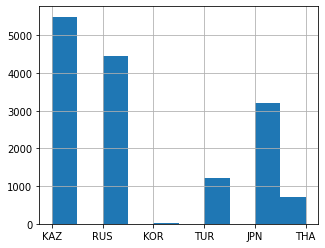

In [56]:

data[(data['brand'] == 'Toyota') | (data['brand'] == 'Hyundai')] ['country_of_origin'].hist(figsize = (5,4
                                                                                                    ))

In [57]:
country = data.groupby('country_of_origin')['index'].count().sort_values( ascending = False).reset_index()
country['percent,%'] = country['index'] / country['index'].sum()*100
country

,country_of_origin,index,"percent,%"
0,RUS,12082,36.952532
1,KAZ,11518,35.227551
2,JPN,4980,15.231221
3,TUR,1214,3.712992
4,UZB,1177,3.599829
5,THA,878,2.685344
6,DEU,349,1.067409
7,GBR,233,0.712625
8,USA,188,0.574994
9,SWE,22,0.067287


Более 70% проданных автомобилей произведены в России и Казахстане

In [58]:
data['sale_usd'].sum()/ 1000000 # смотрим сумму продаж в миллионах долларов

1148.8723748687912

In [59]:
data['quantity'].sum()

43593.0

Общие продажи за 2019 год составили 1148,9 млн долларов США. Всего продано 43593 автомобиля


Text(0, 0.5, 'Выручка')

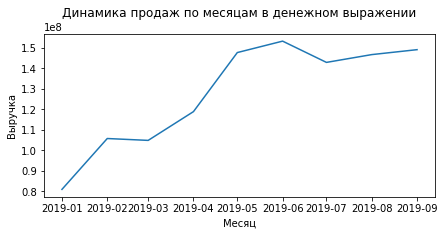

In [60]:
#строим график динамики продаж в денежном выражении
month_sales_usd=data.groupby('date')['sale_usd'].sum().reset_index()
plt.figure(figsize=(7, 3))
sns.lineplot(x='date', y='sale_usd',  data=month_sales_usd)
#month_sales

plt.title('Динамика продаж по месяцам в денежном выражении')
plt.xlabel('Месяц')
plt.ylabel('Выручка')

Text(0, 0.5, 'Количество, шт')

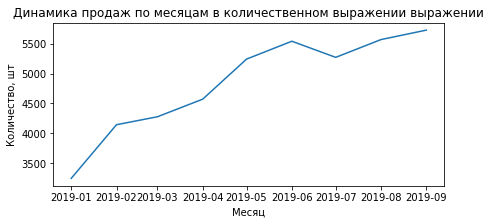

In [61]:
#строим график динамики продаж в количественном выражении выражении
month_sales=data.groupby('date')['quantity'].sum().reset_index()
plt.figure(figsize=(7, 3))
sns.lineplot(x='date', y='quantity',  data=month_sales)
#month_sales

plt.title('Динамика продаж по месяцам в количественном выражении выражении')
plt.xlabel('Месяц')
plt.ylabel('Количество, шт')

В течение года продажи росли в денежном и числовом выражении, был небольшой спад в летнее время

Text(0, 0.5, 'Количество, шт')

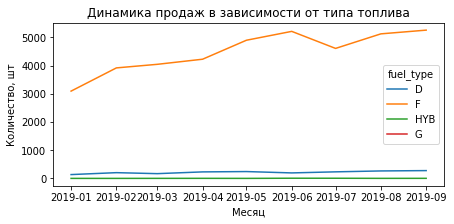

In [62]:
#строим график динамики продаж в зависимости от типа топлива
month_sales_fuel=data.groupby(['date', 'fuel_type'])['quantity'].sum().reset_index()
plt.figure(figsize=(7, 3))
sns.lineplot(x='date', y='quantity',hue = 'fuel_type',  data=month_sales_fuel)
#month_sales

plt.title('Динамика продаж в зависимости от типа топлива')
plt.xlabel('Месяц')
plt.ylabel('Количество, шт')

Ожидаемо, бензин является самым популярным видом топлива

Text(0, 0.5, 'Количество, шт')

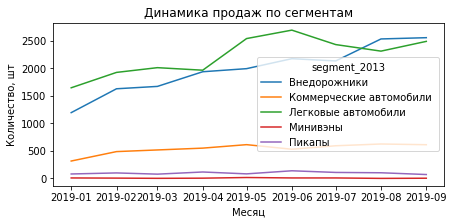

In [101]:
#строим график динамики продаж в зависимости от сегмента
month_sales_class=data.groupby(['date', 'segment_2013'])['quantity'].sum().reset_index()
plt.figure(figsize=(7, 3))
sns.lineplot(x='date', y='quantity',hue = 'segment_2013',  data=month_sales_class)
#month_sales

plt.title('Динамика продаж по сегментам')
plt.xlabel('Месяц')
plt.ylabel('Количество, шт')

Самые популярные категории авто - легковые и внедорожники. Причем в августе продажи внедорожников обогнали легковые авто

Text(0, 0.5, 'Выручка, USD')

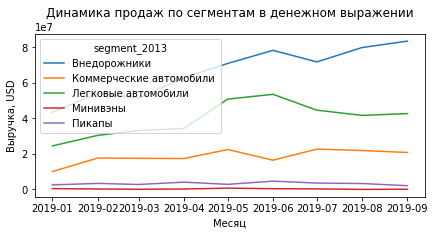

In [102]:
#строим график динамики продаж по сегментам в денежном выражении
month_sales_class=data.groupby(['date', 'segment_2013'])['sale_usd'].sum().reset_index()
plt.figure(figsize=(7, 3))
sns.lineplot(x='date', y='sale_usd',hue = 'segment_2013',  data=month_sales_class)
#month_sales

plt.title('Динамика продаж по сегментам в денежном выражении')
plt.xlabel('Месяц')
plt.ylabel('Выручка, USD')

В денежном выражении больше всего выручки принесли продажи внедорожников. Меньше всего - продажи минивэнов

Text(0, 0.5, 'Количество, шт')

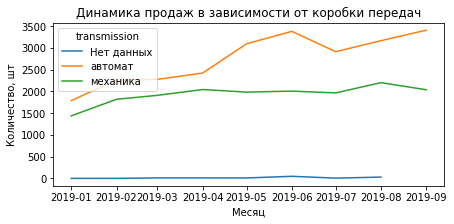

In [115]:
#строим график динамики продаж в количественном выражении в зависимости от типа коробки передач
month_sales_class=data.groupby(['date', 'transmission'])['quantity'].sum().reset_index()
plt.figure(figsize=(7, 3))
sns.lineplot(x='date', y='quantity',hue = 'transmission',  data=month_sales_class)
#month_sales

plt.title('Динамика продаж в зависимости от коробки передач')
plt.xlabel('Месяц')
plt.ylabel('Количество, шт')

Автомобили с автоматической коробкой передач продавались чаще, чем с механической

Text(0, 0.5, 'Количество, шт')

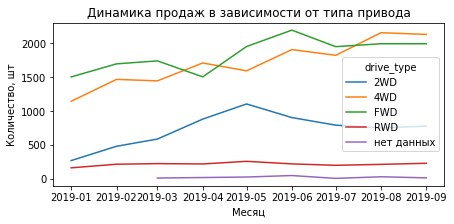

In [116]:
#строим график динамики продаж в количественном выражении в зависимости от типа привода
month_sales_class=data.groupby(['date', 'drive_type'])['quantity'].sum().reset_index()
plt.figure(figsize=(7, 3))
sns.lineplot(x='date', y='quantity',hue = 'drive_type',  data=month_sales_class)
#month_sales

plt.title('Динамика продаж в зависимости от типа привода')
plt.xlabel('Месяц')
plt.ylabel('Количество, шт')

В лидерах передний и подный привод. В целом они отночительно ровно продавались в течение года. По полному приводу более заметен рост, чем по переднему.

In [117]:
#делаем талицу продаж по городам
month_sales_region=data.groupby(['region'])['sale_usd'].sum().sort_values(ascending = False,
                                                                                              ).reset_index()
month_sales_region.head(15)

,region,sale_usd
0,Алматы,3.711375e+08
1,Астана,2.677945e+08
2,Атырау,7.065166e+07
3,Костанай,5.770569e+07
4,Шымкент,5.758839e+07
5,Караганда,5.272039e+07
6,Актау,4.433998e+07
7,Актобе,4.061759e+07
8,Уральск,3.915375e+07
9,Усть-Каменогорск,3.805718e+07


Больше всего продаж в крупных городах - Алматы, Астана. Также в пятерку городов-лидеров продаж входит Костанай - приграничный с Россией город

In [118]:
#таблица продаж по автоцентрам
companies = data.groupby(['company'])['sale_usd'].sum().sort_values( ascending = False).reset_index()
companies['percent,%'] = companies['sale_usd'] / companies['sale_usd'].sum()*100
companies.head(10)

,company,sale_usd,"percent,%"
0,Toyota Motor Kazakhstan,4.686336e+08,40.790748
1,БИПЭК АВТО,1.545306e+08,13.450632
2,Astana Motors,1.289156e+08,11.221058
3,Вираж,5.811699e+07,5.058611
4,ТК КАМАЗ,4.866654e+07,4.236026
5,Nissan Manufacturing RUS,4.385460e+07,3.817186
6,Mercur Auto,3.144025e+07,2.736618
7,Allur Auto,3.004613e+07,2.615271
8,Автоцентр-Бавария,2.428358e+07,2.113688
9,Jaguar Land Rover,1.763110e+07,1.534644


In [119]:
companies = data.groupby('company')['quantity'].sum().sort_values( ascending = False).reset_index()
companies['percent,%'] = companies['quantity'] / companies['quantity'].sum()*100
companies.head(10)

,company,quantity,"percent,%"
0,БИПЭК АВТО,12757.0,29.263873
1,Toyota Motor Kazakhstan,10442.0,23.953387
2,Astana Motors,5781.0,13.261303
3,Вираж,3358.0,7.703072
4,Nissan Manufacturing RUS,1761.0,4.039639
5,УзАвто-Казахстан,1727.0,3.961645
6,Allur Auto,1359.0,3.117473
7,Renault Россия,1084.0,2.486638
8,Mercur Auto,1070.0,2.454523
9,ТК КАМАЗ,888.0,2.037024


Более 40% выручки приходится на автоцентр Toyota Motor Kazakhstan, при этом в количественном выражении лидирует БИПЭК АВТО (29,26% от всех проданных авто)

In [108]:
#сводная таблица по классам и сегментам
autoclass = data.groupby(['segment_2013', 'class_2013'])['quantity'].sum().reset_index() \
              .sort_values(by = ['segment_2013', 'class_2013','quantity'])
autoclass



,segment_2013,class_2013,quantity
0,Внедорожники,Компактные SUV,5551.0
1,Внедорожники,Полноразмерные SUV,2087.0
2,Внедорожники,Среднеразмерные SUV,3138.0
3,Внедорожники,Стандартные SUV,2518.0
4,Внедорожники,Субкомпактные SUV,4515.0
5,Коммерческие автомобили,Большие автобусы,181.0
6,Коммерческие автомобили,Крупнотоннажные грузовики,1249.0
7,Коммерческие автомобили,Малотоннажные грузовики,2181.0
8,Коммерческие автомобили,Микроавтобусы,291.0
9,Коммерческие автомобили,Развозные автомобили,844.0


На основании таблицы можно заметить, что:  
* среди внедорожников чаще продавались Компактные и Субкомпактные SUV  
* среди легковых покупалети чаще выбирали В класс. Также необычно, что количество продаж C и E класса примерно одинаково (3600-3800 шт, а вот D класса продали только 184 шт.  
* среди коммерческих авто чаще продавались малотоннажные грузовики, меньше всего было продано средних автобусов  
    

Text(0, 0.5, 'Средняя цена, USD')

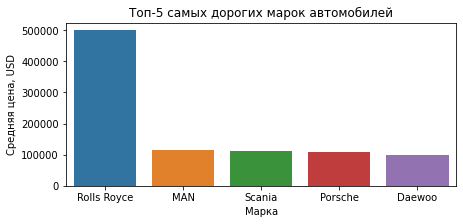

In [120]:
#посмотрим самые дорогие марки автомобилей
brand_price =data.groupby(['brand'])['price_usd'].mean().reset_index().sort_values(by = 'price_usd', ascending = False).head(5)
plt.figure(figsize=(7, 3))
sns.barplot(x='brand', y='price_usd',data=brand_price)


plt.title('Топ-5 самых дорогих марок автомобилей')
plt.xlabel('Марка')
plt.ylabel('Средняя цена, USD')

Text(0, 0.5, 'Средняя цена, USD')

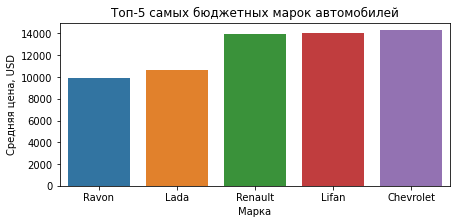

In [110]:
#посмотрим самые бюджетные марки автомобилей
brand_price2 =data.groupby(['brand'])['price_usd'].mean().reset_index().sort_values(by = 'price_usd', ).head(5)
plt.figure(figsize=(7, 3))
sns.barplot(x='brand', y='price_usd',data=brand_price2)


plt.title('Топ-5 самых бюджетных марок автомобилей')
plt.xlabel('Марка')
plt.ylabel('Средняя цена, USD')

Среди самых дорогих марок сильно выделяется Rolls Royce со средней ценой почти 500 тысяч долларов. Также в пятерку входят MAN, Scania, Porshe,Daewoo со средней ценой примерно 100 тысяч долларов

Среди самых дешевых автомобилей - Ravon, Lada, Renault, Lifan и Chevrolet. Интересно, что популярная Toyota не входит в этот список

In [113]:
toyota_sales =data[data['brand'] == 'Toyota'].groupby(['model'])['sale_usd'].sum().reset_index().sort_values(by = 'sale_usd', ascending = False)
toyota_sales

,model,sale_usd
1,Camry,1.158829e+08
6,LC Prado,8.359226e+07
7,LC200,7.359954e+07
8,RAV4,4.222211e+07
4,HILUX DC,2.493188e+07
2,Corolla,2.270110e+07
3,HIGHLANDER,1.616251e+07
0,C-HR,3.251287e+06
5,Hiace,1.531591e+06


у LADA самой популярной моделью оказалась Vesta

### Выводы


Выполнена цель - проанализирован рынок Казахстана

Данные очищенны от дубликатов, приведены к единому стилю

Были сделаны следующие наблюдения:

1. Чаще всего продавалась российская LADA (22.18%), японская Toyota(21.50%) и корейский Hyundai	(13,08%)
1. Больше всего выручки приносит Toyota
1. Общая сумма продаж - 1148.87 млн долларов, продано 43593 шт
1. Toyota популярна несмотря на то, что среди иномарок есть и более бюджетные
1. Более 70% проданных автомобилей произведены в России и Казахстане
1. В течение 2019 года продажи росли в количестве и в денежном аквиваленте
1. Ожидаемо, популярная коробка передач - автомат, топливо - бензин
1.  Наблюдения  по классам автомобилей:  
    * среди внедорожников чаще продавались Компактные и Субкомпактные SUV  
    * среди легковых покупатели чаще выбирали В класс. Также необычно, что количество продаж D и E класса примерно одинаково (3600-3800 шт, а вот промежуточного D класса продали только 184 шт.  
    * среди коммерческих авто чаще продавались малотоннажные грузовики, меньше всего было продано средних автобусов  
1. Одни из самых популярных моделей авто - Lada Vesta и Toyota Camry
1. Большая часть продаж приходится на крупные города - Астана и Алматы.
1. Среди самых дорогих марок сильно выделяется Rolls Royce со средней ценой почти 500 тысяч долларов. Также в пятерку входят MAN, Scania, Porshe,Daewoo со средней ценой примерно 100 тысяч долларов
1. Среди самых бюджетных автомобилей - Ravon, Lada, Renault, Lifan и Chevrolet.  Популярная Toyota не входит в этот список

Рекомендации:

1. Можно проанализировать, почему именно Toyota пользуется такой популярностью при относительно высокой средней цене (может удачная рекламная компания или другие факторы
2. Обратить внимание на низкие продажи D класса легковых автомобилей

In [126]:
# ячейка ревьюера:

# подгружу исходные данные - буду еще к ним возвращаться для примеров :)
reviewer_df = pd.read_csv('kz_2019_final_all_dirt.csv', low_memory=False).drop(columns=['Unnamed: 0'])


# посмотрим на особенности данных, содержащие дубликаты:
(reviewer_df[reviewer_df.duplicated() == True] # оставляем только дубликаты
 .groupby(['Бренд']) # группируем по важным признакам - компания
 .agg(w_dupl_sum = ('Количество','sum')) # подсчитываем ключевые метрики - доли по продажам
 .reset_index()
 .assign(count_share = lambda x: x['w_dupl_sum'] / reviewer_df[reviewer_df.duplicated() == True]['Количество'].sum()) # смотрим на доли
).merge((reviewer_df[reviewer_df.duplicated() == False])
         .groupby(['Бренд']) # группируем по важным признакам - компания
         .agg(wo_dupl_sum = ('Количество','sum'))
         .reset_index()
         .assign(count_share = lambda x: x['wo_dupl_sum'] / reviewer_df[reviewer_df.duplicated() == False]['Количество'].sum()) # смотрим на доли
        , on = "Бренд", how='left'
       )

,Бренд,w_dupl_sum,count_share_x,wo_dupl_sum,count_share_y
0,ANKAI,73.0,0.005459,2.0,0.000065
1,Audi,10.0,0.000748,96.0,0.003139
2,Cadillac,3.0,0.000224,17.0,0.000556
3,Chevrolet,282.0,0.021089,445.0,0.014550
4,Ford,54.0,0.004038,129.0,0.004218
5,GAZ,407.0,0.030437,1704.0,0.055714
6,Hino,2.0,0.000150,60.0,0.001962
7,Hyundai,2971.0,0.222181,2732.0,0.089325
8,Hyundai Truck & Bus,9.0,0.000673,168.0,0.005493
9,Infiniti,18.0,0.001346,81.0,0.002648
